In [4]:
import json
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path

In [41]:
base_maps = {
    "out-rev-char-tiny": "rev",
    "out-char-tiny": "vanilla",
}

In [91]:
logs = {}
for path in base_maps:
    log_path = Path(path) / "log.txt"
    if not log_path.exists():
        continue
    with open(log_path, "r") as f:
        log = [json.loads(line) for line in f]
    logs[base_maps[path]] = log

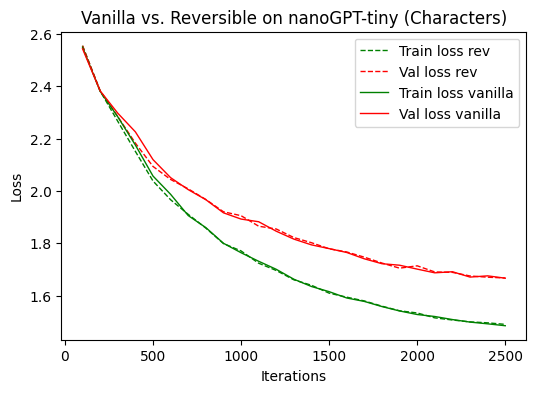

In [93]:
plt.figure(figsize=(6,4))

for k, log in logs.items():
    # if k == "vanilla":
    #     continue
    iters = [v['iter'] for v in log] 
    train_loss = [v['train_loss'] for v in log]
    val_loss = [v['val_loss'] for v in log]
    ls = "--" if "rev" in k else "-"
    plt.plot(iters[1:], train_loss[1:], color="green", linewidth=1, linestyle=ls, label=f"Train loss {k}")
    plt.plot(iters[1:], val_loss[1:], color="red", linewidth=1, linestyle=ls, label=f"Val loss {k}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Vanilla vs. Reversible on nanoGPT-tiny (Characters)")
plt.legend()
plt.show()

## nanoGPT-Long

In [94]:
base_maps = {
    "out-rev-char-long": "rev",
    "out-char-long": "vanilla",
}

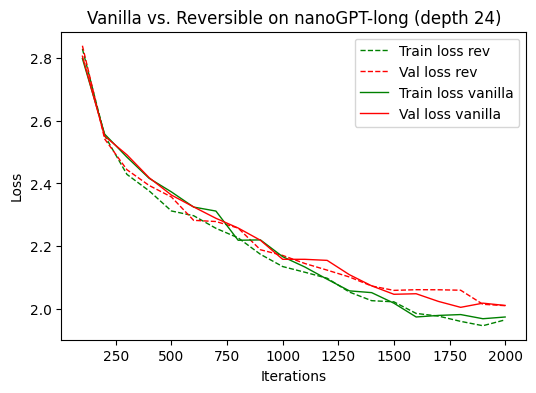

In [141]:
logs = {}
for path in base_maps:
    log_path = Path(path) / "log.txt"
    if not log_path.exists():
        continue
    with open(log_path, "r") as f:
        log = [json.loads(line) for line in f]
    logs[base_maps[path]] = log

plt.figure(figsize=(6,4))

for k, log in logs.items():
    # if k == "vanilla":
    #     continue
    iters = [v['iter'] for v in log] 
    train_loss = [v['train_loss'] for v in log]
    val_loss = [v['val_loss'] for v in log]
    ls = "--" if "rev" in k else "-"
    plt.plot(iters[1:], train_loss[1:], color="green", linewidth=1, linestyle=ls, label=f"Train loss {k}")
    plt.plot(iters[1:], val_loss[1:], color="red", linewidth=1, linestyle=ls, label=f"Val loss {k}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Vanilla vs. Reversible on nanoGPT-long (depth 24)")
plt.legend()
plt.show()

Seems ok from initial testing, despite the small errors! Time to run a GPT-2 repro. :)